## Goal
To build a machine learning model that can predict salary based on a person’s characteristics.

## Importing Libraries

In [2]:
import pandas as pd ## to import the dataset and analyze it
import matplotlib.pyplot as plt ## for statistical graphs
import seaborn as sns ## for statistical graphs
import numpy as np ## for work with matrices
from sklearn.model_selection import train_test_split ## for split the dataset

## Reading the dataset

In [3]:
url = "https://raw.githubusercontent.com/caro6852lq/MachineLearning_PredictSalary/main/Data/2025.2%20-%20Sysarmy%20-%20Encuesta%20de%20remuneraci%C3%B3n%20salarial%20Argentina%20-%20Sysarmy%20-%20sueldos%20-%202025.02CLEAN.csv"

In [4]:
df = pd.read_csv(url, skiprows=9) ## The file has header and rows that do not contain data

In [5]:
df.head(2) 

,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_el_ultimo_semestre,...,salir_o_seguir_contestando_sobre_las_guardias1,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,tengo_edad,genero,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2511178.0,2085000.0,Cobro parte del salario en dólares,Dólar oficial al día de oago,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,43,Mujer Cis,No,True,Semi-Senior,2511178.0
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,2140000.0,2140000.0,Cobro todo el salario en dólares,1160,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,59,Mujer Cis,Sí,True,Senior,2140000.0


In [6]:
df.shape #check of quantity of columns and rows

(3748, 56)

In [7]:
df.info() # check de tipo de dato por columnas
## Ajustar la columna de precio, latitud y longitud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 56 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   donde_estas_trabajando                                                                         3748 non-null   object 
 1   dedicacion                                                                                     3748 non-null   object 
 2   tipo_de_contrato                                                                               3748 non-null   object 
 3   ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos                                      3748 non-null   float64
 4   ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos                                       3580 non-null   float64
 5   pagos_en_dolares    

In [20]:
df0 = df

In [30]:
columnas = ['donde_estas_trabajando', 
            'dedicacion', 
            'tipo_de_contrato',
       'trabajo_de',
       'anos_de_experiencia', 
       'cantidad_de_personas_en_tu_organizacion', 
        'modalidad_de_trabajo',
      'maximo_nivel_de_estudios',
       'estado', 
        'carrera',
        'tengo_edad',
       'genero', 
        'seniority',
        '_sal']

In [31]:
df = df[columnas]

In [32]:
df.head()

,donde_estas_trabajando,dedicacion,tipo_de_contrato,trabajo_de,anos_de_experiencia,cantidad_de_personas_en_tu_organizacion,modalidad_de_trabajo,maximo_nivel_de_estudios,estado,carrera,tengo_edad,genero,seniority,_sal
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),QA / Tester,3,De 2001a 5000 personas,Híbrido (presencial y remoto),NaN,NaN,NaN,43,Mujer Cis,Semi-Senior,2511178.0
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,Manager / Director,10,De 51 a 100 personas,100% remoto,NaN,NaN,NaN,59,Mujer Cis,Senior,2140000.0
2,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Manager / Director,5,Más de 10000 personas,100% remoto,NaN,NaN,NaN,39,Hombre Cis,Semi-Senior,3000000.0
3,Mendoza,Full-Time,Contractor,Developer,17,De 101 a 200 personas,100% remoto,Universitario,Completo,Analista de Sistemas,37,Hombre Cis,Senior,4000000.0
4,Buenos Aires,Full-Time,Staff (planta permanente),Infosec,7,De 51 a 100 personas,100% remoto,NaN,NaN,NaN,35,Hombre Cis,Senior,1300000.0


## Limpieza de Datos

In [ ]:
mapeo = {
    "donde_estas_trabajando": "Provincia", 
    "tipo_de_contrato",
       "pagos_en_dolares",
       "trabajo_de",
       "anos_de_experiencia", 
       "cantidad_de_personas_en_tu_organizacion", 
        "modalidad_de_trabajo",
      "maximo_nivel_de_estudios",
       "estado", 
        "carrera",
        "tengo_edad",
       "genero", 
        "seniority",
        "_sal"

In [ ]:
## Ajusto la columna de precio
df["price_usd"] = (
    df["price_usd"]
      .str.replace("k", "", regex=True)   # quita k/K finales
      )
df["price_usd"] = df["price_usd"].astype("float64")
df["price_usd"] = df["price_usd"]*100

In [ ]:
#Transformar Latitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lat'] = df['lat'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lat'] = df['lat'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lat'] = df['lat'].astype('float64') # paso a float

In [ ]:
#Transformar lonitud a float64
# Primero, debes reemplazar los puntos incorrectos. Usaremos regex para transformar el formato.
df['lon'] = df['lon'].str.replace('.', '', regex=False)  # Eliminar todos los puntos
df['lon'] = df['lon'].apply(lambda x: x[:3] + '.' + x[3:]) #sumo el punto dp de los tres primeros valores
df['lon'] = df['lon'].astype('float64') # paso a float

In [ ]:
# Saber si hay nulos
df.isnull().sum()

In [ ]:
#Reemplazo los nulos por "sin dato"
df.fillna({'property_type': 'Sin Dato'}, inplace=True)

In [ ]:
#Completar nulos
df = df.fillna(0)

## Analisis Exploratorio (previo modelo)

### Limpieza de Outliers Target

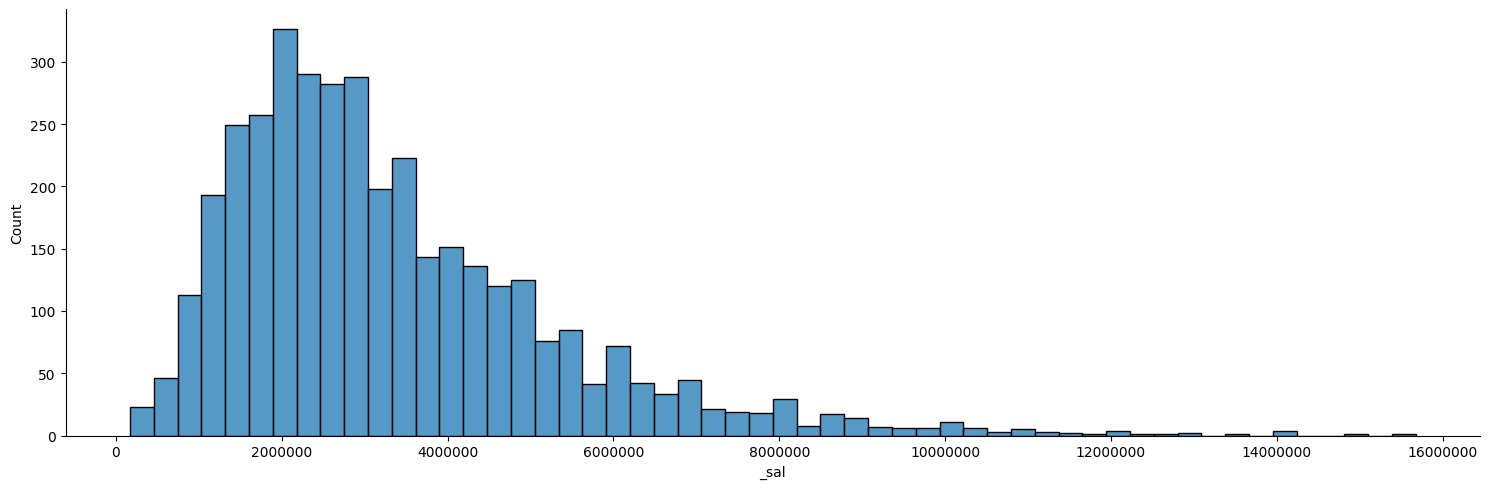

In [25]:
## Reviso la distribución de la variable a predecir
sns.displot(df["_sal"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

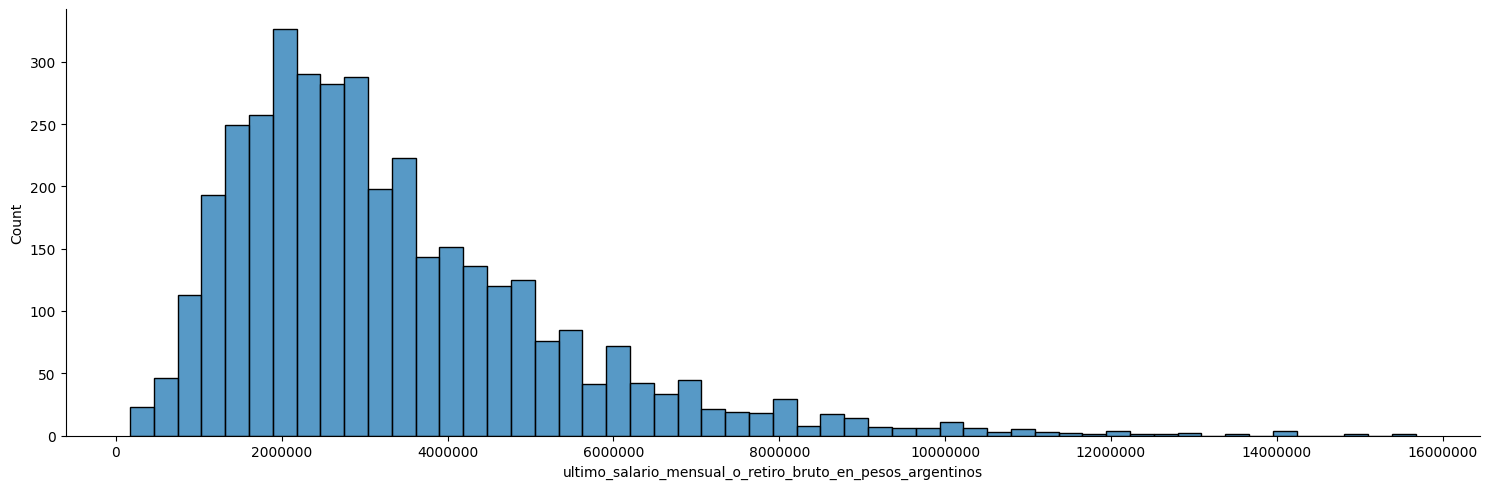

In [26]:
## Reviso la distribución de la variable a predecir
sns.displot(df["ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

df.price_usd.describe()

##### Método DS

In [ ]:
media = df["price_usd"].mean()
desv_std = df["price_usd"].std()
print(media, desv_std)

In [ ]:
LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std
print(LI_DS, LS_DS)

In [ ]:
# Filtramos los valores dentro del rango
df = df[(df["price_usd"] >= LI_DS) & (df["price_usd"] <= LS_DS)]
df.shape


In [ ]:
## Reviso el df_limpio
sns.displot(df["price_usd"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

### Limpieza de Outliers Variables

#### Variables Numéricas

##### Sup Total

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["surface_total"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
df = df[df['surface_total'] < 184000]

In [ ]:
## Superficie Total por DS

media = df["surface_total"].mean()
desv_std = df["surface_total"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df[df['surface_total']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )


In [ ]:
# Filtramos los valores dentro del rango para la superficie total
df = df[(df["surface_total"] >= LI_DS) & (df["surface_total"] <= LS_DS)]
df.shape


In [ ]:
# Agrego un filtro arbitrario para valores bajos ya que no surgió por los métodos tradicionales
df = df[(df["surface_total"] >= 10)]
df.shape


##### Sup Cubierta

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["surface_covered"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Lat y Lon

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["lat"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["lon"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

##### Rooms

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["rooms"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
## Reviso el df_limpio
sns.displot(df["rooms"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
## En este caso tomo un modo arbitrario
# Filtramos los valores dentro del rango para la superficie total
df = df[(df["rooms"] < 17) ]

print('Registros en df limpio:', df.shape[0])
print('Registros en df original:', df_0.shape[0])
print('% Registros conservados;', df.shape[0]/df.shape[0])

#### Variables Categóricas

In [ ]:
##Para ver los valores que asume una dimensión
df["property_type"].unique()

In [ ]:
## Borro los registros "Sin Dato" para tipo de propiedad
df = df[df["property_type"] !='Sin Dato']

print('Registros en df limpio:', df.shape[0])
print('Registros en df original:', df_0.shape[0])
print('% Registros conservados;', df.shape[0]/df.shape[0])

In [ ]:
##Para ver los valores que asume una dimensión
df["rooms"].unique()

In [ ]:
##Para ver los valores que asume una dimensión
df["barrio"].unique()

In [ ]:
##Para ver los valores que asume una dimensión
df["comuna"].unique()

In [ ]:
#Entender que tienen de diferente barrio y columna
df.groupby(['barrio', 'comuna']).size().sort_index(level=['comuna', 'barrio'])


### Variables a considerar

In [ ]:
## Saco: description, title, floor (x cantidad de nulos), columnas calculadas, expensas porque la mayoría tiene valor $0
df=df[["ID", "property_type",'lat', 'lon','price_usd', 'surface_total', 'surface_covered','rooms',
       'barrio', 'comuna']]

In [ ]:
# Defino las variables numéricas
numerical = ['lat', 'lon', 'surface_total','surface_covered', 'rooms']

In [ ]:
# Defino las variables categóricas
categorical = ['property_type','barrio', 'comuna']

#### Correlación

In [ ]:
## Analizo la correlación para variables numéricas

sns.pairplot(df[['price_usd', 'lat', 'lon', 'surface_total','surface_covered', 'rooms']])

In [ ]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

### Divido el Dataset

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price_usd.values
y_val = df_val.price_usd.values
y_test = df_test.price_usd.values

del df_train['price_usd']
del df_val['price_usd']
del df_test['price_usd']

In [ ]:
len(df_train), len(df_test), len(df_val)

## Modelo Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

#Hago la predicción
y_pred = model.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

## RL r2_score --  0.7557617985788082

## Modelo Decision Tree

In [ ]:
#Importo la función que necesito
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

In [ ]:
dtr.get_params()

In [ ]:
#from sklearn.tree import export_text
#print(export_text(dtr, feature_names=dv.get_feature_names_out()))

In [ ]:
#Hago la predicción con TEST
y_pred = dtr.predict(X_train)

#Mido el modelo
r2_score(y_train, y_pred)

In [ ]:
#Hago la predicción con VAL
y_pred = dtr.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441

#### Decision trees parameter tuning

In [ ]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
     
    #Hago la predicción
    y_pred = dtr.predict(X_val)
    
    #Mido el modelo
    r2 = r2_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, r2))



In [ ]:
scores = []
 
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dtr = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dtr.fit(X_train, y_train)
 
        #Hago la predicción y mido el modelo
        y_pred = dtr.predict(X_val)
        r2 = r2_score(y_val, y_pred)
             
        scores.append((d, s, r2))
 
columns = ['max_depth', 'min_samples_leaf', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores.sort_values(by='r2', ascending=False).head()

In [ ]:
plt.figure(figsize=(10, 8))  # ancho x alto, podés ajustar los valores
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['r2'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f", cmap="YlGnBu")

plt.title("R2 Scores by min_samples_leaf and max_depth")
plt.show()

In [ ]:
## Modelo con parámetros ajustados
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)
dtr.fit(X_train, y_train)

In [ ]:
# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825

## Modelo Random-forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=10, 
                            random_state=1,
                            n_jobs=-1
                           )
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_val)

In [ ]:
#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492

In [ ]:
scores = []
 
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict(X_val)
        r2 = r2_score(y_val, y_pred)
 
        scores.append((d, n, r2))
 
columns = ['max_depth', 'n_estimators', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

In [ ]:
# Let's plot it
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.r2,
             label='max_depth=%d' % d)
 
plt.legend()

In [ ]:
rf = RandomForestRegressor(n_estimators=25,
                           max_depth = 200,
                           random_state=1,
                            n_jobs=-1
                           )
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553

In [ ]:
!pip install xgboost
 
import xgboost as xgb

In [ ]:
features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

In [ ]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model_xgb.predict(dval)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553
# XGB r2_score --- 0.8505679046774839

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
def parse_xgb_output(output):
    results = []
 
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
 
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
     
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [ ]:
'eta=%s' % (xgb_params['eta'])
# Output: 'eta=0.3'

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
 
# Output: 'eta=0.3'

In [ ]:
scores

In [ ]:
scores['eta=0.3']

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
# Output: 'eta=1.0'

In [ ]:
scores.keys()

In [ ]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)

plt.legend()

Me quedo con eta de 0.3

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 15,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)
 
#plt.ylim(0.8, 0.84)
plt.legend()

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 30,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

In [ ]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)
 
plt.legend()

In [ ]:
xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 1, ## Mejor opción
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [ ]:
y_pred = model_xgb.predict(dval)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553
# XGB r2_score --- 0.8505679046774839
# XGB Ajustado r2_score --- 0.8711028223293713

## Selección de Modelo Final

En este análisis se probaron diferentes modelos: de regresión lineal, árbol de decisión, random forest y xgboost.

La métrica utilizada para evaluar el desempeño de los modelos fue el coeficiente de determinación R², que mide qué tan bien las variables explican la variabilidad del precio.

Se selecciona el modelo xgboost

#### Entreno el modelo final

In [ ]:
df_full_train.head()

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
y_full_train = df_full_train.price_usd.values

In [ ]:
del df_full_train['price_usd']

In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
 
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
feature_names = list(dv.get_feature_names_out())

In [ ]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
 
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [ ]:
xgb_params = {
    'eta': 0.3, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 1, ## Mejor opción
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params,dfulltrain, num_boost_round=100)

In [ ]:
y_pred = model_xgb.predict(dtest)

#Mido el modelo
r2_score(y_test, y_pred)

# RL r2_score --  0.7557617985788082
# DT r2_score -- 0.7735939283232441
# DT Ajustado r2_score -- 0.825
# RF r2_score -- 0.8497901763819492
# RF Ajustado r2_score -- 0.8627054610020553
# XGB r2_score --- 0.8505679046774839
# XGB Ajustado r2_score --- 0.8711028223293713

In [ ]:
print('Real      : ', y_test[:5])
print('Prediccion: ', y_pred[:5])

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Línea ideal: donde y = x (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.title("Comparación entre precios reales y predichos")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6,4))

sns.kdeplot(y_test, label='Real', fill=True, linewidth=2)
sns.kdeplot(y_pred, label='Predicción', fill=True, linewidth=2)

plt.title('Distribución de precios reales vs predicción')
plt.xlabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()